# Salary Data(Naive Bayes)

In [28]:
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv("C:\\Users\\Rahul\\Downloads\\SalaryData_Test.csv")

In [30]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [31]:
data_label=data.copy()

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data_label.iloc[:,-1]=labelencoder.fit_transform(data_label.iloc[:,-1])     
data_label.iloc[:,1]=labelencoder.fit_transform(data_label.iloc[:,1])
data_label.iloc[:,2]=labelencoder.fit_transform(data_label.iloc[:,2])
data_label.iloc[:,3]=labelencoder.fit_transform(data_label.iloc[:,3])
data_label.iloc[:,4]=labelencoder.fit_transform(data_label.iloc[:,4])
data_label.iloc[:,6]=labelencoder.fit_transform(data_label.iloc[:,6])
data_label.iloc[:,7]=labelencoder.fit_transform(data_label.iloc[:,7])
data_label.iloc[:,8]=labelencoder.fit_transform(data_label.iloc[:,8])
data_label.iloc[:,10]=labelencoder.fit_transform(data_label.iloc[:,10])
data_label.iloc[:,-2]=labelencoder.fit_transform(data_label.iloc[:,-2])

In [33]:
data_label.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,6,4,Machine-op-inspct,3,2,1,0,0,40,37,0
1,38,2,11,8,2,Farming-fishing,0,4,1,0,0,50,37,0
2,28,1,7,11,2,Protective-serv,0,4,1,0,0,40,37,1
3,44,2,15,9,2,Machine-op-inspct,0,2,1,7688,0,40,37,1
4,34,2,0,5,4,Other-service,1,4,1,0,0,30,37,0


In [7]:
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
def split_into_words(i):
    return (i.split(" "))

In [10]:
from sklearn.model_selection import train_test_split

data_train,data_test = train_test_split(data, test_size=0.3)

In [11]:
# Preparing Word Count Matrix Format :

from sklearn.feature_extraction.text import CountVectorizer
data_matrix = CountVectorizer(analyzer=split_into_words).fit(data.Salary)
data_matrix

CountVectorizer(analyzer=<function split_into_words at 0x0000016A08B291F0>)

In [12]:
data_matrix_all = data_matrix.transform(data.Salary)
data_matrix_all.shape

(15060, 3)

In [13]:
train_data_matrix = data_matrix.transform(data_train.Salary)
train_data_matrix.shape

test_data_matrix = data_matrix.transform(data_test.Salary)
test_data_matrix.shape

(4518, 3)

In [14]:
# Without TFIDF matrices
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB

In [15]:
# Multinomial Naive Bayes :

classifier_mb = MB()
classifier_mb.fit(train_data_matrix,data_train.workclass)

train_pred_m = classifier_mb.predict(train_data_matrix)
accuracy_train_m = np.mean(train_pred_m==data_train.workclass)

test_pred_m = classifier_mb.predict(test_data_matrix)
accuracy_test_m = np.mean(test_pred_m==data_test.workclass)

In [16]:
print("Accuracy of Train Data : ",accuracy_train_m)
print("Accuracy of Test Data : ",accuracy_test_m)

Accuracy of Train Data :  0.7328780117624739
Accuracy of Test Data :  0.7293050022133688


In [17]:
# With TFIDF matrices
# Preparing a naive bayes model on training data set

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(data_matrix_all)

train_tfidf = tfidf_transformer.transform(train_data_matrix)
print("train_tfidf.shape : ",train_tfidf.shape)

test_tfidf = tfidf_transformer.transform(test_data_matrix)
print("test_tfidf.shape : ",test_tfidf.shape)

train_tfidf.shape :  (10542, 3)
test_tfidf.shape :  (4518, 3)


In [18]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

In [19]:
# Multinomial Naive Bayes :

classifier_mb = MB()
classifier_mb.fit(train_tfidf,data_train.workclass)

train_predict_mb = classifier_mb.predict(train_tfidf)
accuracy_train_mb = np.mean(train_predict_mb == data_train.workclass)

test_predict_mb = classifier_mb.predict(test_tfidf)
accuracy_test_mb = np.mean(test_predict_mb == data_test.workclass)

In [20]:
print("Accuracy of Train Data : ",accuracy_train_mb)
print("Accuracy of Test Data : ",accuracy_test_mb)

Accuracy of Train Data :  0.7328780117624739
Accuracy of Test Data :  0.7293050022133688


In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

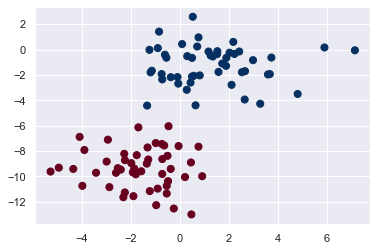

In [23]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

NameError: name 'Xnew' is not defined

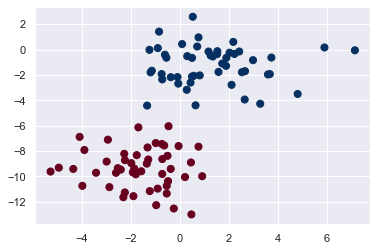

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);